*EDA_and_Vistualization.ipynb* <p style='text-align: right;'> <b> September 20th 2020 </b> </p>
<p style='text-align: right;'> <b> David Diston </b> </p>

# EDA and Visualization of the Data

***The .csv on which EDA is performed has been created in the previous step `01-Computer_Pianist-Create_CSV`***

The goal of this EDA and Visualization is to gain a better understanding of the variable distribution in the dataset:
1. I will explore statistical metrics of numeric columns:
    * e.g. `Min`, `Max`, `Mean`, etc.
2. I will observe the frequency distrubution for relevant variables:
    * Including `Composer`, `Performer Nationality`, `Performer Gender`, `Length`, `Tempo`
3. I will create visualizations to clearly show my findings:
    * Histograms and bar charts of the data distribution

In [1]:
# I will begin by importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# The data has been exported to midi_files.csv in the working directory in the last step
data = pd.read_csv('midi_files.csv')

In [3]:
# Here I will check to make sure that the data has been imported correctly
data.head()

,Composer,Performer,Perf_Nationality,Perf_Gender,Piece,Length,Tempo,Time_Signature,Freq_C,Freq_C#/Db,...,Freq_F#/Gb,Freq_G,Freq_G#/Ab,Freq_A,Freq_A#/Bb,Freq_B,Unique_Velocities,Average_Velocity,Min_Velocity,Max_Velocity
0,Albeniz,JieChen,China,F,TrianaFromIberia,299,215,4/4,0.07603,0.14623,...,0.12477,0.03364,0.12954,0.09272,0.03709,0.08159,109,64.54,6,118
1,Albeniz,InesaSinkevych,Israel,F,TrianaFromIberia,261,210,4/4,0.07430,0.14861,...,0.12023,0.03612,0.12822,0.09056,0.03689,0.08127,100,70.56,6,108
2,Albeniz,AndrewStaupe,USA,M,EvocationsFromIberia,324,198,4/4,0.05186,0.10722,...,0.08479,0.08059,0.12964,0.03013,0.10652,0.08199,97,49.84,3,101
3,Albeniz,GregoryDeTurck,USA,M,RondenaFromIberia,412,187,4/4,0.07866,0.06898,...,0.08337,0.10521,0.04467,0.13201,0.06973,0.06725,116,67.68,3,119
4,Albeniz,GregoryDeTurck,USA,M,Iberia,1246,196,4/4,0.08401,0.08824,...,0.08480,0.10109,0.07221,0.09783,0.06041,0.07793,115,63.29,3,117


In [19]:
# I will start EDA by exploring all variables in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Composer           2587 non-null   object 
 1   Performer          2587 non-null   object 
 2   Perf_Nationality   2587 non-null   object 
 3   Perf_Gender        2587 non-null   object 
 4   Piece              2587 non-null   object 
 5   Length             2587 non-null   int64  
 6   Tempo              2587 non-null   int64  
 7   Time_Signature     2587 non-null   object 
 8   Freq_C             2587 non-null   float64
 9   Freq_C#/Db         2587 non-null   float64
 10  Freq_D             2587 non-null   float64
 11  Freq_D#/Eb         2587 non-null   float64
 12  Freq_E             2587 non-null   float64
 13  Freq_F             2587 non-null   float64
 14  Freq_F#/Gb         2587 non-null   float64
 15  Freq_G             2587 non-null   float64
 16  Freq_G#/Ab         2587 

Since I created this dataframe in the last step, I have a pretty good understanding of the variables included. However, the above output does confirm that all variables have the same numer of observations, and that each datatype appears to be correct for the data contained.

Personally, I find the non-numeric variables in this dataset more interesting, so I will begin by exploring those.

### Non-Numeric EDA

In [23]:
# First I am going to examine the frequency with which each composer appears in the dataset
data['Composer'].value_counts() 

Chopin       396
Beethoven    318
Liszt        283
Schubert     197
Bach         181
            ... 
Medtnet        1
Poulenc        1
DeFalla        1
Rodrigo        1
Menotti        1
Name: Composer, Length: 98, dtype: int64

In [24]:
# Since there appears to be a large range, I will look at only the most prevalent composers
data['Composer'].value_counts().loc[lambda x : x >= 100] 

Chopin          396
Beethoven       318
Liszt           283
Schubert        197
Bach            181
Prokofiev       114
Ravel           109
Rachmaninoff    109
Haydn           105
Name: Composer, dtype: int64

In [25]:
# Who are the top 10 composers found in the dataset
data['Composer'].value_counts().to_frame().head(10)

,Composer
Chopin,396
Beethoven,318
Liszt,283
Schubert,197
Bach,181
Prokofiev,114
Ravel,109
Rachmaninoff,109
Haydn,105
Schumann,98


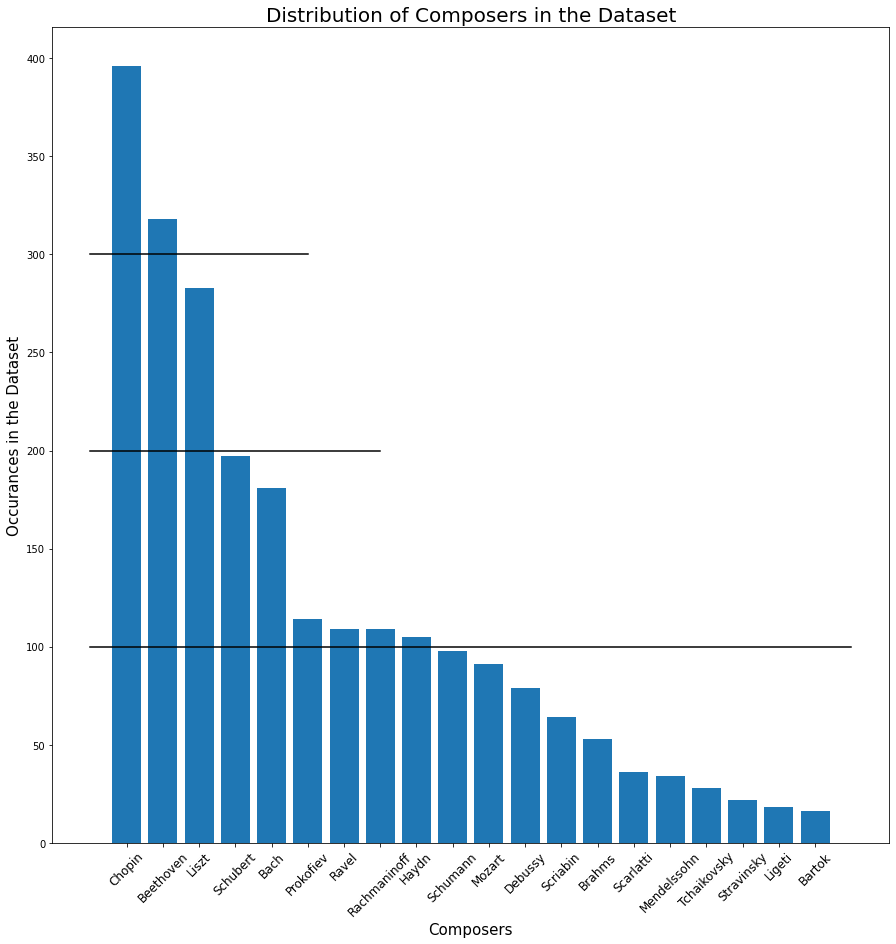

In [49]:
# To better visualize the composer distribution, I will create a bar graph showing the prevalence of the top 20 composers
plt.figure(figsize = (15, 15))
plt.bar(top_20_composers.index, top_20_composers['Composer'])
plt.plot([-1, 20], [100, 100], color = 'black')
plt.plot([-1, 7], [200, 200], color = 'black')
plt.plot([-1, 5], [300, 300], color = 'black')
plt.title('Distribution of Composers in the Dataset', fontsize = 20)
plt.ylabel('Occurances in the Dataset', fontsize = 15)
plt.xlabel('Composers', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

There is clearly a large disparity in the distribution of composers in the dataset. When building models to classify different composers, I will have to take this into consideration, and find a way to miditage the extreme class imbalance.

Next, lets look at the `Performer` variable.

In [51]:
# How many unique performers (pianists) are present in the dataset
len(data['Performer'].value_counts())

343

There are a significant number of unique pianists present in the dataset. For this reason, it is unlikely that any kind of classification model would be able to predict a particular pianist with any acceptable level of accuracy. While this data may be in some way predictive, of some other variable (such as tempo, or maximum velocity), such correlations are beyond the scope of this project. Therefore this variable will not be considered further.

The performer nationality and performer gender columns may hold interesting insights for future projects, such a predicting the gender of a concert pianist based on how they play. Out of curiosity I will explore these variables here.

In [52]:
# Calculate the number of occurances of each nationality for all countries with at least 10 occurances
data['Perf_Nationality'].value_counts().loc[lambda x : x >= 10]

USA              520
China            433
Russia           330
SouthKorea       232
Canada           199
Ukraine           90
Japan             88
Germany           63
Belarus           63
Italy             54
Taiwan            54
Israel            54
Australia         42
Switzerland       31
Poland            29
Spain             27
Denmark           26
Georgia           21
Hungary           20
Finland           19
CostaRica         18
Netherlands       18
France            15
HongKong          15
Norway            14
Romania           11
UnitedKingdom     10
NewZealand        10
Name: Perf_Nationality, dtype: int64

In [53]:
# Show the gender distribution in the data
data['Perf_Gender'].value_counts()

M    1521
F    1066
Name: Perf_Gender, dtype: int64

As with the other variables observed above, the `Performer Nationality` variable contains a significant number of unique observations. Additionally, these observations are quite imbalanced. In any future project if I were to use the `Performer Nationality` as a dependent or independent variable, it may be prudent to bin countries by larger geographical area, to better balance the classes, and reduce the number of unique observations.

There is also a substantial class imbalance in the gender of performers, which was not expected. While not a concern for this project, this is an interesting observation that may prompt further study in the future.

### Numeric EDA

Of the several Numeric variable present in the dataset, `Length`, `Tempo`, and `Unique Velocities` are the most pertinent to this project, and will be explored below.

While the distribution of pitch frequencies for each composer could be interesting to calculate, any observations would only be a gross approximation of key signiture, and would not conclusively indicate a composers most frequent key. Additionally, classical pieces modulate frequently (especially those of the classical period where the Sonata compositional form is utilized), an many pieces have no key signature at all (for example many modern compositions that utilize the construct of a 'tonal centre' rather than a key signature). For these reasons, it is unlikely that exploration of pitch usage will provide any significant insight into the data, and will therefore not be covered in this EDA.

In [55]:
# I created the dataset using only pieces in 4/4, however I will confirm this here
data['Time_Signature'].value_counts()

4/4    2587
Name: Time_Signature, dtype: int64

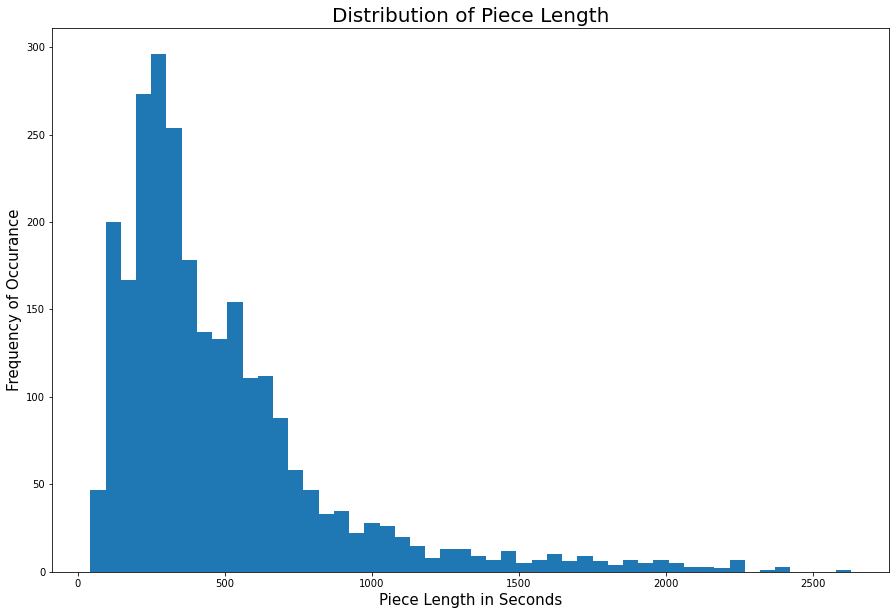

In [68]:
# Here I plot the data distribution of Piece Length
plt.figure(figsize = (15,10))
plt.hist(data['Length'], bins = 50)
plt.ylabel('Frequency of Occurance', fontsize = 15)
plt.xlabel('Piece Length in Seconds', fontsize = 15)
plt.title('Distribution of Piece Length', fontsize = 20)
plt.show()

From the above histogram, as is quickly becoming expected, the distribution of `Piece Length` in the dataset is quite large, and uneven. The distribution is heavily skewed to the right, with significantly more shorter pieces observed in the dataset compared to longer pieces. It appears that the most common length of piece is approximately 400 seconds, or ~6:40. This makes sense, as many pieces included in the dataset are short etudes or preludes, with a few sonatas and fugues present as well.

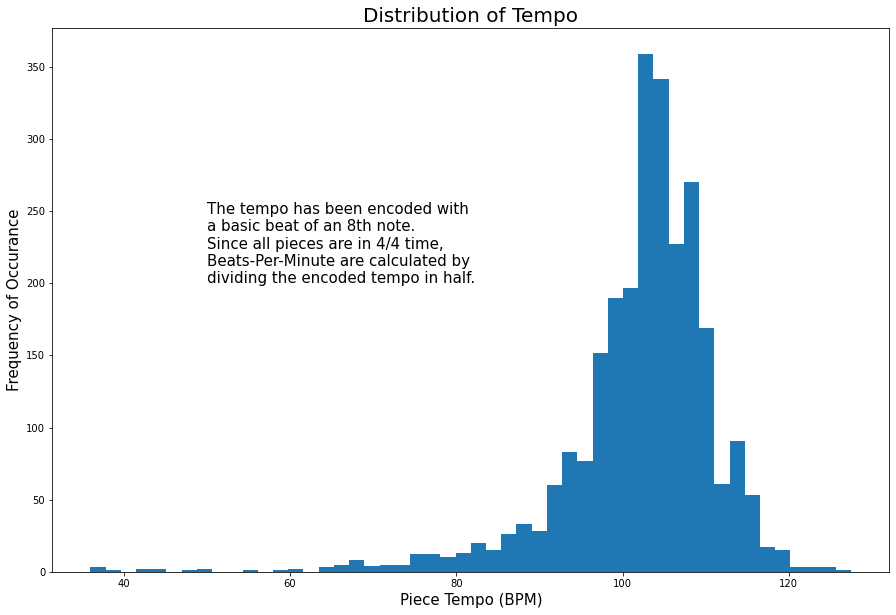

In [73]:
# Here I plot the data distribution of Piece Tempo
plt.figure(figsize = (15,10))
# Plot tempo/2 to get BPM
plt.hist(data['Tempo']/2, bins = 50)
plt.ylabel('Frequency of Occurance', fontsize = 15)
plt.xlabel('Piece Tempo (BPM)', fontsize = 15)
plt.title('Distribution of Tempo', fontsize = 20)
plt.annotate('The tempo has been encoded with \na basic beat of an 8th note. \nSince all pieces are in 4/4 time, \nBeats-Per-Minute are calculated by \ndividing the encoded tempo in half.', fontsize = 15, xy=(50,200))
plt.show()

The distribution of tempo appears to be somewhat normal, with a slight skew to the left (slower pieces). These observations make musical sense, based on my musical background, and where expected.

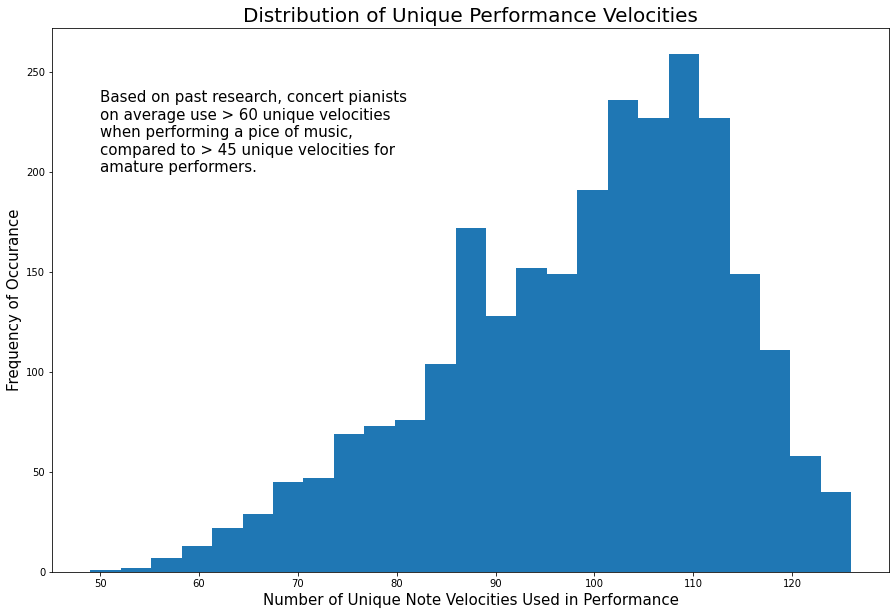

In [80]:
# Here I plot the data distribution of Unique Velocities
plt.figure(figsize = (15,10))
plt.hist(data['Unique_Velocities'], bins = 25)
plt.ylabel('Frequency of Occurance', fontsize = 15)
plt.xlabel('Number of Unique Note Velocities Used in Performance', fontsize = 15)
plt.title('Distribution of Unique Performance Velocities', fontsize = 20)
plt.annotate('Based on past research, concert pianists \non average use > 60 unique velocities \nwhen performing a pice of music, \ncompared to > 45 unique velocities for \namature performers.', fontsize = 15, xy=(50,200))
plt.show()

The above observation will be very important in this project when predicting either a human or computer performance of a piece of music. [Past research](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3121738/) has shown that pianists use on average at least 45 unique velocities when playing a piano piece. Computer coded midi files however are often coded with either a single universal velocity, or else a small handful of ~10 velocities with cover the velocity spectrum from 0-127 (midi velocity range). The high average unique velocity of human performers will be very helpful when predicting between a human or computer performer.

While there is potential for more EDA and Visualization on this dataset, I have covered all the pertinent variables related to this project. Further analysis may be conducted in the future based upon the success of this project, and any further projects based on this dataset.

<p style='text-align: right;'> <b> Next Step: </b> Quantize (bin) Music to reduce data density - <em> Human_MIDI_Quantizer.ipynb </em> </p>